#03-1 k-최근접 이웃 회귀

##데이터 준비

In [2]:
import numpy as np
#특성 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
#타깃 데이터
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

##데이터 확인하기

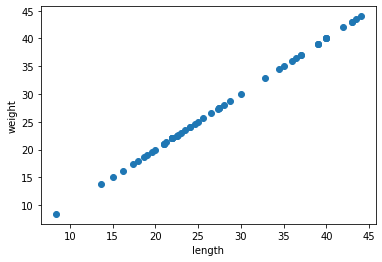

In [4]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_length)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split                                  
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [6]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [11]:
test_array = test_array.reshape(2, 2) #2행 2열로 재배열
print(test_array.shape)

(2, 2)


In [12]:
test_array

array([[1, 2],
       [3, 4]])

In [17]:
#2차원 배열로 변환하기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [18]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [21]:
knr.score(test_input, test_target)
#예측과 타깃이 거의 일치함 -> 결정계수가 1에 근접

0.992809406101064

In [24]:
#결정계수는 직감적이지 않음
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae
#타깃과 예측의 절댓값 오차의 평균

19.157142857142862

##과대 적합 vs 과소 적합

In [26]:
print(knr.score(train_input, train_target)) #과소적합

0.9698823289099254


####-과대적합: 훈련세트에만 잘 맞는 모델로, 테스트세트보다 점수가 너무 높은 경우 
####-과소적합: 테스트세트의 점수가 높거나 두 점수 모두 너무 낮은 경우(훈련세트에 적절히 훈련되지 않은 경우)

In [28]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)
#이웃의 개수를 줄여 국지적으로 민감하게 만들어 모델을 복잡하게 만들어 훈련셋에 훈련을 잘시켜 과소적합 해소

0.9804899950518966

In [29]:
knr.score(test_input, test_target)

0.9746459963987609

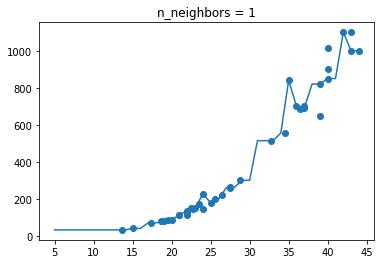

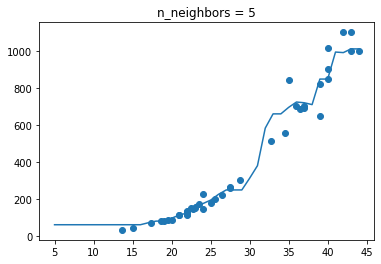

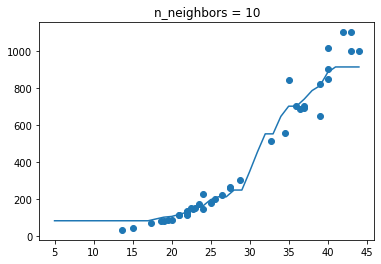

In [31]:
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
   knr.n_neighbors = n
   knr.fit(train_input, train_target)

   prediction = knr.predict(x)

   plt.scatter(train_input, train_target)
   plt.plot(x, prediction)
   plt.title('n_neighbors = {}'.format(n))
   plt.show()

#03-2 선형회귀

##k-최근접 이웃의 한계

In [32]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [34]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

In [35]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [36]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [38]:
print(knr.predict([[50]]))

[1033.33333333]


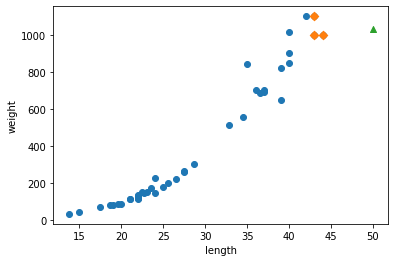

In [39]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [40]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [44]:
print(knr.predict([[100]]))

[1033.33333333]


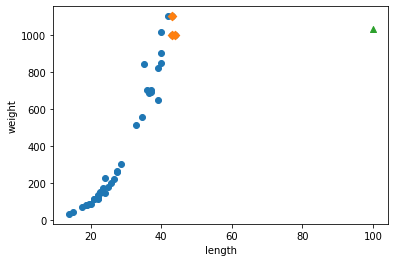

In [47]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#k-최근접 이웃 모델의 한계

##선형회귀

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [50]:
print(lr.coef_, lr.intercept_) # 선형회귀 모델의 기울기 파라미터와 절편 파라미터

[39.01714496] -709.0186449535477


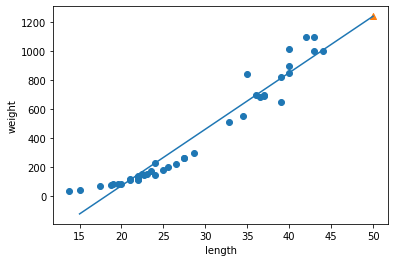

In [52]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [55]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) #과대적합보단 전체적인 과소 적합 + 왼쪽 아래의 오점들

0.939846333997604
0.8247503123313558


##다항회귀

###최적의 곡선 찾기 :   a x 길이^2 + b x 길이 + c

In [63]:
#길의 제곱항 합차기
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [64]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [68]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])  #직선회귀 보다 정확도가 올라감

array([1573.98423528])

In [71]:
print(lr.coef_, lr.intercept_) #다항회귀 모델이 학습한 a, b, c 값

[  1.01433211 -21.55792498] 116.0502107827827


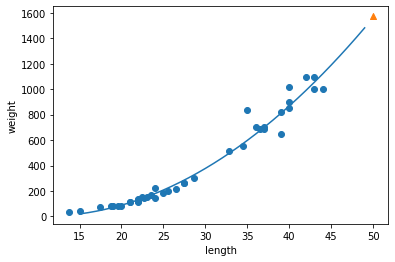

In [72]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [74]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#약간의 과소적합 -> 더 복잡한 모델 필요

0.9706807451768623
0.9775935108325122


#03-3 특성 공학과 규제

##다중회귀

####-여러 개의 특성을 사용한 선형회귀
####-특성2개 -> 평면을 학습 ,  타깃 = a x 특성1 + b x 특성2 + 절편
####-특성공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업


In [75]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [76]:
import pandas as pd

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [77]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

##사이킷런 변환기

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
#변환기(전처리기)로 다중의 특성 만들기

(42, 9)


In [80]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [81]:
#훈련세트 기준으로 테스트 셋 변환하기
test_poly = poly.transform(test_input)

In [84]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [86]:
print(lr.score(test_poly, test_target))
#많은 특성을 사용하니 다소적합이 해결되고 높은 점수가 반환

0.9714559911594134


In [88]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
#5차항 -> 55개의 특성

(42, 55)


In [89]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999991097

In [92]:
lr.score(test_poly, test_target)
# 엄청난 과대 적합, 샘플개수42< 특성 55개

-144.40579242684848

##규제

####-규제: 과대적합 방지(훈련세트 과도 학습 방지), 각 모델의 기준으로 규제를 적용
####-정규화: 규제를 가한 모델을 학습하기 전에 각 특성의 스케일을 일정하게 맞추어 주는 정규화 과정을 거치는 모델 StandardScaler 클래스 사용(특성을 더해주는 PolynomialFeatures 클래스와 마찬가지로 변환기의 일종임)





In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly) #훈련세트로 변환기 모델 학습할것
train_scaled = ss.transform(train_poly)  #훈련세트 정규화
test_scaled = ss.transform(test_poly)  #테스트세트 정규화

##릿지 회귀

In [94]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [96]:
ridge.score(test_scaled, test_target) #규제로 하여금 테스트 세트 복구 완료

0.9790693977615391

####-적절한 alpha값 (규제의 강도) 찾기: 훈련세트와 테스트셋의 점수(R^2)가 가장 가까운 값

In [97]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

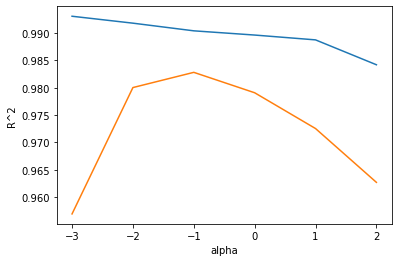

In [99]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#적절한 alpha값은 -1

In [100]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9903815817570365
0.9827976465386884


##라쏘 회귀

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [103]:
lasso.score(test_scaled, test_target)

0.9800593698421883

In [104]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


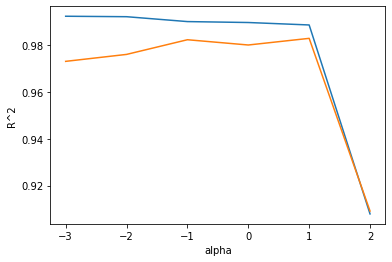

In [107]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [110]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
#과대, 과소 적합도 아닌 균형잡인 score


0.9888067471131867
0.9824470598706695


####-값이 0인 계수의 개수

In [111]:
print(np.sum(lasso.coef_ == 0))

40
